# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [8]:
# Your code here

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
testi=pd.read_csv("../PS_20174392719_1491204439457_log.csv")
testi.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
testi.describe()
testi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### What is the distribution of the outcome? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cee2128>,
      dtype=object)

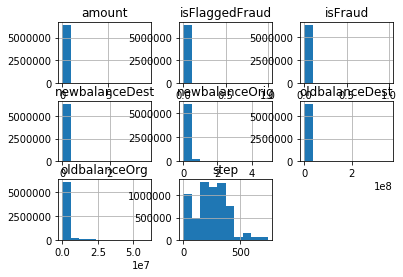

In [10]:
# Your response here

testi.hist()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [17]:
# Your code here
testi.dtypes


from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
testi["nameDest"] = lb_make.fit_transform(testi["nameDest"])
testi["nameOrig"] = lb_make.fit_transform(testi["nameOrig"])
testi["type"] = lb_make.fit_transform(testi["type"])
testi.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [12]:
 def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(testi)

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Run a logisitc regression classifier and evaluate its accuracy.

In [22]:
# Your code here
y_balanced = testi.isFraud
X_balanced = testi.drop(['isFraud', 'type','nameOrig', 'nameDest'], axis=1)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X =X_balanced.values 
y = y_balanced.values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
regr = LinearRegression()
model = regr.fit(X_std, y)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state = 29)
model.score(X_test, y_test)

0.1518237728277252

### Now pick a model of your choice and evaluate its accuracy.

In [20]:
# Your code here
y_balanced = testi.isFraud
X_balanced = testi.drop(['isFraud', 'type','nameOrig', 'nameDest'], axis=1)
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
X = X_balanced.values 
y = y_balanced.values
regr = DecisionTreeRegressor(random_state = 29)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 29)
model = regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.668911622398753

### Which model worked better and how do you know?

In [23]:
# Your response here

###The DecisionTreeRegressor because it was the best score.